<h2 align=center> Classify Radio Signals from Outer Space with Keras</h2>

![](Allen_Telescope.jpg)
[Allen Telescope Array](https://flickr.com/photos/93452909@N00/5656086917) by [brewbooks](https://www.flickr.com/people/93452909@N00) is licensed under [CC BY 2.0](https://creativecommons.org/licenses/by/2.0/)

## Task 1: Import Libraries

In [ ]:
from livelossplot.tf_keras import PlotLossesCallback
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn import metrics

import numpy as np
np.random.seed(42)
import warnings;warnings.simplefilter('ignore')
%matplotlib inline
print('Tensorflow version:', tf.__version__)

## Task 2: Load and Preprocess SETI Data

In [3]:
train_images=pd.read_csv('dataset/train/images.csv',header=None)
train_labels=pd.read_csv('dataset/train/labels.csv',header=None)
val_images=pd.read_csv('dataset/validation/images.csv',header=None)
val_labels=pd.read_csv('dataset/validation/labels.csv',header=None)


In [4]:
train_images.head(3)

,0,1,2,3,4,5,6,7,8,9,...,8182,8183,8184,8185,8186,8187,8188,8189,8190,8191
0,0.631373,0.623529,0.713726,0.705882,0.658824,0.666667,0.654902,0.635294,0.647059,0.705882,...,0.682353,0.611765,0.650980,0.658824,0.600000,0.603922,0.654902,0.694118,0.658824,0.666667
1,0.725490,0.752941,0.749020,0.701961,0.690196,0.721569,0.709804,0.745098,0.654902,0.721569,...,0.721569,0.698039,0.721569,0.686275,0.713726,0.682353,0.690196,0.698039,0.701961,0.725490
2,0.717647,0.701961,0.713726,0.733333,0.705882,0.717647,0.725490,0.682353,0.717647,0.674510,...,0.709804,0.694118,0.705882,0.682353,0.639216,0.713726,0.670588,0.678431,0.737255,0.674510


In [5]:
train_labels.head(3)

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0


In [6]:
print("Training set shape:",train_images.shape,train_labels.shape)

Training set shape: (3200, 8192) (3200, 4)


In [8]:
x_train=train_images.values.reshape(3200,64,128,1)
x_val=val_images.values.reshape(800,64,128,1)

y_train=train_labels.values
y_val=val_labels.values

## Task 3: Plot 2D Spectrograms

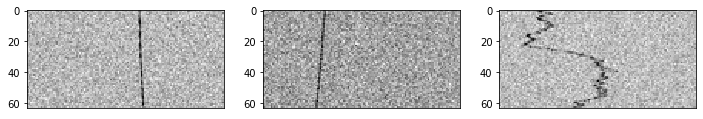

In [15]:
plt.figure(0,figsize=(12,12))
for i in range(1,4):
    plt.subplot(1,3,i)
    img=np.squeeze(x_train[np.random.randint(0,x_train.shape[0])])
    plt.xticks([])
    plt.xticks([])
    plt.imshow(img,cmap='gray')

## Task 4: Create Training and Validation Data Generators

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen_train=ImageDataGenerator(horizontal_flip=True)
datagen_train.fit(x_train)

datagen_val=ImageDataGenerator(horizontal_flip=True)
datagen_val.fit(x_train)


## Task 5: Creating the CNN Model

In [17]:
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint

In [18]:
# Initialising the CNN
model = Sequential()
# 1st Convolution
model.add(Conv2D(32,(5,5),padding = 'same',input_shape = (64,128,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(64,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
# Flattening
model.add(Flatten())
# Fully connected layer
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

model.add(Dense(4,activation='softmax'))

## Task 6: Learning Rate Scheduling and Compile the Model

In [20]:
initial_learning=0.005
lr_schedule=tf.keras.optimizers.schedules.ExponentialDecay(
initial_learning_rate=initial_learning,
    decay_steps=5,
    decay_rate=0.96,
    staircase=True
)
optimizer=Adam(learning_rate=lr_schedule)

In [21]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 128, 32)       832       
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 128, 32)       128       
_________________________________________________________________
activation (Activation)      (None, 64, 128, 32)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 64, 64)        2

## Task 7: Training the Model

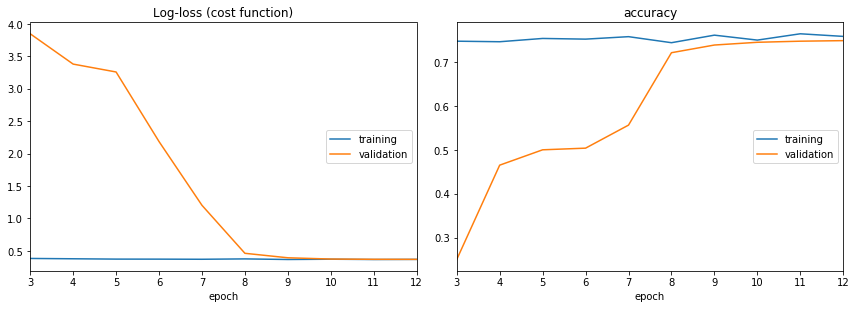

Log-loss (cost function):
training   (min:    0.367, max:    0.661, cur:    0.369)
validation (min:    0.370, max:    3.847, cur:    0.370)

accuracy:
training   (min:    0.683, max:    0.764, cur:    0.758)
validation (min:    0.250, max:    0.749, cur:    0.749)
100/100 [==============================] - 7s 66ms/step - loss: 0.3692 - accuracy: 0.7584 - val_loss: 0.3696 - val_accuracy: 0.7487


In [24]:
checkpoint=ModelCheckpoint('model_weights.h5',monitor='val_loss',
                          save_weights_only=True,
                           mode='min',
                          verbose=0)
callbacks=[PlotLossesCallback(),checkpoint]

batch_size=32

history=model.fit(
    datagen_train.flow(x_train,y_train,batch_size,shuffle=True),
    steps_per_epoch=len(x_train)//batch_size,
    validation_data=datagen_val.flow(x_val,y_val,batch_size=batch_size,shuffle=True),
    epochs=12,
    callbacks=callbacks
)

## Task 8: Model Evaluation

In [27]:
model.evaluate(x_val,y_val)

800/800 [==============================] - 1s 769us/sample - loss: 0.3699 - accuracy: 0.7487


[0.3699223601585254, 0.74875]

In [33]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns

y_true=np.argmax(y_val,1)
y_pred=np.argmax(model.predict(x_val),1)
print(metrics.classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       200
           1       0.50      0.99      0.66       200
           2       0.67      0.02      0.04       200
           3       1.00      1.00      1.00       200

    accuracy                           0.75       800
   macro avg       0.79      0.75      0.67       800
weighted avg       0.79      0.75      0.67       800



In [29]:
labels = ["squiggle", "narrowband", "noise", "narrowbanddrd"]


In [35]:
print("Classification accuracy: %0.6f"%metrics.accuracy_score(y_true,y_pred))

Classification accuracy: 0.748750
